# Final Project | Big Ideas in Computing & Information
## Matthew Kindja - Group 32
### *Walkability*

Link to the WPRDC Dataset: "Sidewalk to Street Ratio" https://data.wprdc.org/dataset/sidewalk-to-street-walkability-ratio/resource/b90ccee1-c0aa-43b9-93e2-8a25e690c393

## Our first step is to take this dataset and abstract away the useless information!

In [1]:
import pandas as pd
import numpy as np

In [4]:
with open("sidewalkstreetratiotract.csv") as data:
    df = pd.read_csv(data)

df = df.iloc[0:402] # Truncate data; trim unncessary rows.
df = df.sort_values(by="Ratio", ascending=False) # Sort by the metric we're measuring: Ratio
df['Ratio'] = df['Ratio'].astype(float) # Convert Ratio column to floats
df['Tract'] = df['Tract'].astype(int) # To remove the decimal from the end, convert our floats into ints!
df['Tract'] = df['Tract'].astype(str) # Since pandas likes to truncate big integers, convert the tracts
df = df.head(20) # Grab the top 10 tracts.

df = df.drop(388) # Drop all rows below! Their ratios are errors
df

,Tract,SidewalkStepLFt,StreetLFt,Ratio
11,42003050900,34060.43485,5125.794855,6.644908
401,42003982200,51352.28584,12695.022100,4.045073
399,42003981200,31844.77914,10014.352300,3.179914
13,42003051100,21923.74413,7265.428071,3.017543
88,42003260900,58729.59554,21650.722550,2.712593
12,42003051000,43118.82257,16923.273120,2.547901
363,42003561200,38381.61857,17396.215870,2.206320
25,42003080900,38603.78731,17756.642170,2.174048
43,42003120800,58309.53547,27154.436550,2.147330
26,42003090100,50888.31723,23840.789700,2.134506


## Nice! We have a list of our data, but we just want the top 20. Once graphed, we can color code bars to help understand the information better!

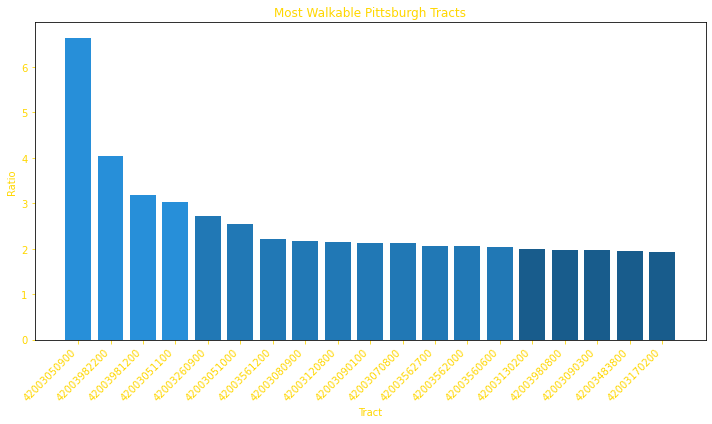

In [5]:
import matplotlib.pyplot as plt

tracts = df['Tract'].to_numpy()
ratios = df['Ratio'].to_numpy()

colors = []
for ratio in ratios:
  if ratio < 2:
    colors.append('#185c8c')
  elif ratio >= 3:
    colors.append('#278fd9')
  else:
    colors.append('#2178b5')

plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(tracts, ratios, color=colors)  # Tracts on x-axis, ratios on y-axis
plt.xlabel('Tract', color='gold')
plt.ylabel('Ratio', color='gold')
plt.title('Most Walkable Pittsburgh Tracts', color='gold')
plt.xticks(rotation=45, ha='right', color='gold')  # Rotate x-axis labels for better readability
plt.tick_params(axis='x', colors='gold')
plt.tick_params(axis='y', colors='gold')
plt.tight_layout()

plt.show()

## This data isn't readable! Since there isn't an easy way to merge tract numbers with the neighborhood names, I'll use census.gov to convert tract numbers into neighborhood names!

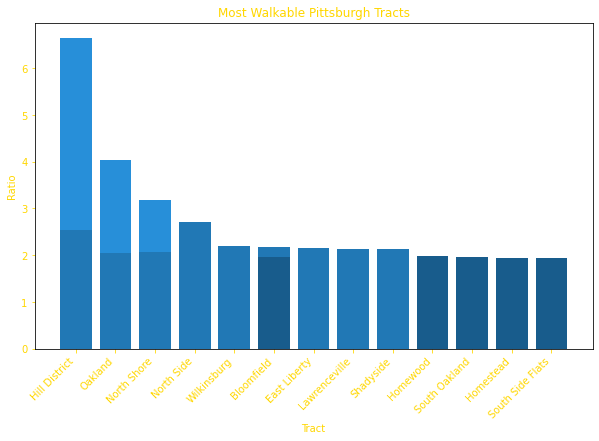

In [4]:
import matplotlib.pyplot as plt

tracts = df['Tract'].to_numpy()
ratios = df['Ratio'].to_numpy()

df.iloc[0, 0] = "Hill District" # 42003050900
df.iloc[1, 0] = "Oakland" # 42003982200
df.iloc[2, 0] = "North Shore" # 42003981200
df.iloc[3, 0] = "Hill District"# 42003051100
df.iloc[4, 0] = "North Side" # 42003260900
df.iloc[5, 0] = "Hill District" # 42003051000
df.iloc[6, 0] = "Wilkinsburg" # 42003561200
df.iloc[7, 0] = "Bloomfield" # 42003080900
df.iloc[8, 0] = "East Liberty" # 42003120800
df.iloc[9, 0] = "Lawrenceville" # 42003090100
df.iloc[10, 0] = "Shadyside" # 42003070800
df.iloc[11, 0] = "North Shore" # 42003562700
df.iloc[12, 0] = "Oakland" # 42003562000
df.iloc[13, 0] = "Wilkinsburg" # 42003560600
df.iloc[14, 0] = "Homewood" # 42003130200
df.iloc[15, 0] = "South Oakland" # 42003980800
df.iloc[16, 0] = "Bloomfield" # 42003090300
df.iloc[17, 0] = "Homestead" # 42003483800
df.iloc[18, 0] = "South Side Flats" # 42003170200

colors = []
for ratio in ratios:
  if ratio < 2:
    colors.append('#185c8c')
  elif ratio >= 3:
    colors.append('#278fd9')
  else:
    colors.append('#2178b5')

plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(tracts, ratios, color=colors)  # Tracts on x-axis, ratios on y-axis
plt.xlabel('Tract', color='gold')
plt.ylabel('Ratio', color='gold')
plt.title('Most Walkable Pittsburgh Tracts', color='gold')
plt.xticks(rotation=45, ha='right', color='gold')  # Rotate x-axis labels for better readability
plt.tick_params(axis='x', colors='gold')
plt.tick_params(axis='y', colors='gold')
# plt.tight_layout()

plt.show()

## Methodology
Why *this* metric in particular? Fast, reliable transportation is crucial to city life. Access to the diverse arrangement of amenities found throughout Pittsburgh is imperative to a healthy, active life and participation is one’s community. Effective infrastructure for foot transportation affords citizens a comfortable way to enjoy the outdoors, something especially crucial in densely populated suburbs.

## Explanation
Hill District takes the clear lead in my dataset, reaching all the way up to a ratio of 6! Oakland isn't trailing too far behind, either. Hill District, Oakland, and North Shore take the lead as the most navigable Pittsburgh neighborhood based on the metric of walkability. I'd love to merge this data with a heatmap of Pittsburgh to get a better visual understanding of walkability around the city. I'd bet there are some clear historic reasons for certain areas of the city being more walkable than others.